<a href="https://colab.research.google.com/github/data-aleks/CreditCardChurn-PredictiveModelling/blob/main/CreditCardChurn_PredictiveModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Churn - PredictiveModelling**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

**Objective**

To build a predictive model that helps a bank identify customers at risk of churn, enabling the business to take proactive action in retaining valuable clients. This notebook focuses on the technical groundwork using Python — from data exploration to model development.

**Project Structure**

1.   Introduction
2.   Dataset Overview
3.   Data Cleaning & Exploratory Data Analysis(EDA)
4.   Feature Engineering
5.   Modelling
6.   Model Insights

**Project Outcome**

This project successfully developed and deployed a robust Gradient Boosting Classifier to predict customer churn within a credit card user base. The model demonstrated strong performance across key metrics, including high accuracy, precision, recall, and an excellent F1-score and ROC AUC, confirming its effectiveness in identifying potential churners. Crucially, the analysis revealed trans_ct (transaction count) as the most influential feature driving churn predictions. By leveraging an optimized classification threshold, the model identified a manageable and actionable segment of 126 "at-risk" customers (1.24% of the base), who are predicted to churn but have not yet.

## 1. **Introduction**

**Business Problem**

The bank is facing a rising concern: an increasing number of customers are closing their credit card accounts. This churn trend is causing financial and strategic challenges, and leadership wants to understand which customers are likely to leave so they can intervene with tailored services or offers

**Project Objective**

This notebook (Part 1 of a 3-part analytical solution) tackles the problem using Python to:



*   Explore customer behavior and account data.
*   Engineer relevant features from raw variables.
*   Build predictive models that estimate churn risk.
*   Provide actionable insights that inform targeted customer retention strategies.



This groundwork leads into:



*   **Part 2**: Designing a Power BI dashboard for interactive visualizations.
*   **Part 3**: Conducting a business analysis to recommend retention strategies backed by data.




## 2. **Dataset Overview**

**Source**

This dataset is publicly available on [Kaggle: Credit Card Customers Dataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data). It contains detailed information on 10,127 customers, including demographic attributes, account activity, and churn status.


**Key Features**

The dataset includes 18 variables that span across customer profiles and credit card usage patterns. Some notable features are:

- Customer_Age: Age of the customer
- Gender: Male or Female
- Dependent_count: Number of dependents
- Education_Level: Highest education attained
- Marital_Status: Marital status of the customer
- Income_Category: Estimated annual income
- Card_Category: Type of credit card held
- Months_on_book: Tenure with the bank
- Total_Trans_Ct: Number of transactions in the last 12 months
- Credit_Limit: Assigned credit card limit
- Attrition_Flag: Indicates whether the customer has churned


**Target Variable**

- Attrition_Flag: This binary feature identifies whether a customer is Existing or Attrited. It will serve as the target for churn prediction.


**Initial Observations**

- The dataset is clean and well-structured, with minimal missing values.
- Features are a mix of categorical and numerical types, suitable for both statistical analysis and machine learning.
- The churn rate appears imbalanced, with lowe number of churned customers as a proportion of the whole.


## 3. **Data Cleaning & Exploratory Data Analysis (EDA)**

### 3.1 **Loading and Exploring Data**

In [2]:
df_original = pd.read_csv('./drive/MyDrive/datasets/credit_card_churn/BankChurners.csv')

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
df_original.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


### 3.2 **Removing/Renaming Columns**

Let's create a copy of our original dataframe for cleaning.

In [5]:
df_cleaned = df_original.copy()

3.2.1 **Remove the last two columns**

In [6]:
df_cleaned.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

3.2.2 **Update column names to lower case**

In [7]:
df_cleaned.columns = df_cleaned.columns.str.lower()

3.2.3 **Rename columns to be more concise**

In [8]:
df_cleaned.rename(columns={
    'clientnum': 'client_id',
    'attrition_flag': 'churn_flag',
    'customer_age': 'age',
    'gender': 'gender',
    'dependent_count': 'dependents',
    'education_level': 'education',
    'marital_status': 'marital',
    'income_category': 'income',
    'card_category': 'card_type',
    'months_on_book': 'tenure_months',
    'total_relationship_count': 'relationships',
    'months_inactive_12_mon': 'inactive_months',
    'contacts_count_12_mon': 'contact_count',
    'credit_limit': 'limit',
    'total_revolving_bal': 'revolving_bal',
    'avg_open_to_buy': 'open_to_buy',
    'total_amt_chng_q4_q1': 'amt_chg_q4_q1',
    'total_trans_amt': 'trans_amt',
    'total_trans_ct': 'trans_ct',
    'total_ct_chng_q4_q1': 'ct_chg_q4_q1',
    'avg_utilization_ratio': 'util_ratio'
}, inplace=True)


3.2.4 **Confirm our changes**

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        10127 non-null  int64  
 1   churn_flag       10127 non-null  object 
 2   age              10127 non-null  int64  
 3   gender           10127 non-null  object 
 4   dependents       10127 non-null  int64  
 5   education        10127 non-null  object 
 6   marital          10127 non-null  object 
 7   income           10127 non-null  object 
 8   card_type        10127 non-null  object 
 9   tenure_months    10127 non-null  int64  
 10  relationships    10127 non-null  int64  
 11  inactive_months  10127 non-null  int64  
 12  contact_count    10127 non-null  int64  
 13  limit            10127 non-null  float64
 14  revolving_bal    10127 non-null  int64  
 15  open_to_buy      10127 non-null  float64
 16  amt_chg_q4_q1    10127 non-null  float64
 17  trans_amt   

In [10]:
df_cleaned.tail()

,client_id,churn_flag,age,gender,dependents,education,marital,income,card_type,tenure_months,...,inactive_months,contact_count,limit,revolving_bal,open_to_buy,amt_chg_q4_q1,trans_amt,trans_ct,ct_chg_q4_q1,util_ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


### 3.3 **Encoding Data Values**

Let's create a copy of our cleaned dataframe for encoding

In [11]:
df_encoded = df_cleaned.copy()

3.3.1 **Replacing churn_flag values to Boolean True/False**

In [12]:
df_encoded['churn_flag'] = df_encoded['churn_flag'].map({
    'Attrited Customer': True,
    'Existing Customer': False
})

In [13]:
df_encoded.tail()

,client_id,churn_flag,age,gender,dependents,education,marital,income,card_type,tenure_months,...,inactive_months,contact_count,limit,revolving_bal,open_to_buy,amt_chg_q4_q1,trans_amt,trans_ct,ct_chg_q4_q1,util_ratio
10122,772366833,False,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,True,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,True,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,True,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,True,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


3.3.2 **Encoding Education Levels**



In [15]:
education_order = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5,
    'Unknown': -1
}
df_encoded['education_encoded'] = df_encoded['education'].map(education_order)

3.3.3 **Encoding Income levels**

In [16]:
income_order = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5 # Example if you had more categories
}
df_encoded['income_encoded'] = df_encoded['income'].map(income_order)

3.3.4 **Encoding Nominal Columns**

In [17]:
nominal_cols_to_encode = ['gender', 'marital', 'card_type']
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols_to_encode, drop_first=True)
cols_to_drop = [ 'education', 'income']
df_encoded = df_encoded.drop(columns=cols_to_drop, errors='ignore')

In [18]:
df_encoded.columns = df_encoded.columns.str.lower()

Confirm our changes

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   client_id           10127 non-null  int64  
 1   churn_flag          10127 non-null  bool   
 2   age                 10127 non-null  int64  
 3   dependents          10127 non-null  int64  
 4   tenure_months       10127 non-null  int64  
 5   relationships       10127 non-null  int64  
 6   inactive_months     10127 non-null  int64  
 7   contact_count       10127 non-null  int64  
 8   limit               10127 non-null  float64
 9   revolving_bal       10127 non-null  int64  
 10  open_to_buy         10127 non-null  float64
 11  amt_chg_q4_q1       10127 non-null  float64
 12  trans_amt           10127 non-null  int64  
 13  trans_ct            10127 non-null  int64  
 14  ct_chg_q4_q1        10127 non-null  float64
 15  util_ratio          10127 non-null  float64
 16  educ

In [20]:
df_encoded.head()

,client_id,churn_flag,age,dependents,tenure_months,relationships,inactive_months,contact_count,limit,revolving_bal,...,util_ratio,education_encoded,income_encoded,gender_m,marital_married,marital_single,marital_unknown,card_type_gold,card_type_platinum,card_type_silver
0,768805383,False,45,3,39,5,1,3,12691.0,777,...,0.061,1,3,True,True,False,False,False,False,False
1,818770008,False,49,5,44,6,1,2,8256.0,864,...,0.105,3,1,False,False,True,False,False,False,False
2,713982108,False,51,3,36,4,1,0,3418.0,0,...,0.000,3,4,True,True,False,False,False,False,False
3,769911858,False,40,4,34,3,4,1,3313.0,2517,...,0.760,1,1,False,False,False,True,False,False,False
4,709106358,False,40,3,21,5,1,0,4716.0,0,...,0.000,0,3,True,True,False,False,False,False,False


## 4. **Feature Engineering**

In this section we will add features to our dataset to help us with predicting our customer churn based.

We will copy our encoded dataframe

In [21]:
df_engineered = df_encoded.copy()

### 4.1 **Behavioral Metrics**

In this section we will introduce some behavioral metrics to our dataset. Like **transaction amount per month**, **transaction count per month**, **average transaction amount**.

4.1.1 **Transaction amount per month**

In [22]:
df_engineered['trans_amt_per_month'] = df_engineered['trans_amt'] / df_engineered['tenure_months']

4.1.2 **Transactions per month**

In [23]:
df_engineered['trans_ct_per_month'] = df_engineered['trans_ct'] / df_engineered['tenure_months']

4.1.3 **Average transaction amount**

In [24]:
df_engineered['avg_trans_amt'] = df_engineered['trans_amt'] / df_engineered['trans_ct']

### 4.2 **Credit Dynamics**

In this section we will add credit dynamics features to our dataset like balance_to_limit_ration, credit_usage_efficiency, credit_growth_rate.

4.2.1 **Balance to limit ration**

In [25]:
df_engineered['balance_to_limit_ratio'] = df_engineered['revolving_bal'] / df_engineered['limit']

4.2.2 **Credit usage efficiency**

In [26]:
df_engineered['credit_usage_efficiency'] = df_engineered['open_to_buy'] / df_engineered['limit']

4.2.3 **Credit Growth Rate**

In [27]:
df_engineered['credit_growth_rate'] = df_engineered['amt_chg_q4_q1'] * df_engineered['limit']

In [28]:
df_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                10127 non-null  int64  
 1   churn_flag               10127 non-null  bool   
 2   age                      10127 non-null  int64  
 3   dependents               10127 non-null  int64  
 4   tenure_months            10127 non-null  int64  
 5   relationships            10127 non-null  int64  
 6   inactive_months          10127 non-null  int64  
 7   contact_count            10127 non-null  int64  
 8   limit                    10127 non-null  float64
 9   revolving_bal            10127 non-null  int64  
 10  open_to_buy              10127 non-null  float64
 11  amt_chg_q4_q1            10127 non-null  float64
 12  trans_amt                10127 non-null  int64  
 13  trans_ct                 10127 non-null  int64  
 14  ct_chg_q4_q1          

### 4.3 **Create final dataframe ready for modelling**

In [29]:
df_final = df_engineered.copy()

## 5. **Modelling**

### 5.1 **Preparing data for model training**

In this step we will train our model to hopefully predict customers which are potentially at the risk of churn in our dataset.

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                10127 non-null  int64  
 1   churn_flag               10127 non-null  bool   
 2   age                      10127 non-null  int64  
 3   dependents               10127 non-null  int64  
 4   tenure_months            10127 non-null  int64  
 5   relationships            10127 non-null  int64  
 6   inactive_months          10127 non-null  int64  
 7   contact_count            10127 non-null  int64  
 8   limit                    10127 non-null  float64
 9   revolving_bal            10127 non-null  int64  
 10  open_to_buy              10127 non-null  float64
 11  amt_chg_q4_q1            10127 non-null  float64
 12  trans_amt                10127 non-null  int64  
 13  trans_ct                 10127 non-null  int64  
 14  ct_chg_q4_q1          

First we will create two variables. X will store our dataset minus the target variable and client id ( as this is not required to build a model ). variable y will store our target flag ( what are we looking to predict ) in our case churn_flag

In [31]:
X = df_final.drop(['churn_flag', 'client_id'], axis=1) # All columns except 'churn_flag' are features
y = df_final['churn_flag'] # 'churn_flag' is the target variable

We will split our dataset in to training and testing, essentially creating 4 separate datasets for training and testing of the model.

In [32]:
# Split the data into training and testing sets
# stratify=y is crucial for imbalanced datasets to ensure both train/test sets
# have a similar proportion of churned/non-churned customers.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("\nTarget distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("Target distribution in y_test:")
print(y_test.value_counts(normalize=True))


Shape of X_train: (7595, 29)
Shape of X_test: (2532, 29)
Shape of y_train: (7595,)
Shape of y_test: (2532,)

Target distribution in y_train:
churn_flag
False    0.839368
True     0.160632
Name: proportion, dtype: float64
Target distribution in y_test:
churn_flag
False    0.839258
True     0.160742
Name: proportion, dtype: float64


In this step we will prepare our data for by sclaing our numerical data

In [33]:
# Identify numerical columns that need scaling (all non-boolean/non-encoded categorical)
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

print(f"\nNumerical columns to scale: {numerical_cols}")

scaler = StandardScaler()

# Fit scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convert back to DataFrame, preserving column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

# Recombine scaled numerical features with unscaled (one-hot encoded boolean) features
# First, identify non-numerical columns (which would be your one-hot encoded booleans)
non_numerical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

X_train_final = pd.concat([X_train_scaled_df, X_train[non_numerical_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test[non_numerical_cols]], axis=1)

# Ensure column order is consistent (important for some models, though not strictly required for all)
X_train_final = X_train_final[X_train.columns]
X_test_final = X_test_final[X_test.columns]

print("\nShapes after scaling and re-concatenation:")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")


Numerical columns to scale: ['age', 'dependents', 'tenure_months', 'relationships', 'inactive_months', 'contact_count', 'limit', 'revolving_bal', 'open_to_buy', 'amt_chg_q4_q1', 'trans_amt', 'trans_ct', 'ct_chg_q4_q1', 'util_ratio', 'education_encoded', 'income_encoded', 'trans_amt_per_month', 'trans_ct_per_month', 'avg_trans_amt', 'balance_to_limit_ratio', 'credit_usage_efficiency', 'credit_growth_rate']

Shapes after scaling and re-concatenation:
X_train_final shape: (7595, 29)
X_test_final shape: (2532, 29)


### 5.2 **Training Logistic Regression, Random Forest and Gradient Boosting**

In this step we train our selected models based on our data.

In [34]:
print("\n--- Training Logistic Regression Model ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # liblinear is good for small datasets
log_reg_model.fit(X_train_final, y_train)

y_pred_lr = log_reg_model.predict(X_test_final)
y_prob_lr = log_reg_model.predict_proba(X_test_final)[:, 1] # Probability of churn (True class)


--- Training Logistic Regression Model ---


In [35]:
print("\n--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # 'balanced' can help with imbalanced data
rf_model.fit(X_train_final, y_train)

y_pred_rf = rf_model.predict(X_test_final)
y_prob_rf = rf_model.predict_proba(X_test_final)[:, 1]


--- Training Random Forest Classifier ---


In [36]:
print("\n--- Training Gradient Boosting Classifier ---")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_final, y_train)

y_pred_gb = gb_model.predict(X_test_final)
y_prob_gb = gb_model.predict_proba(X_test_final)[:, 1]


--- Training Gradient Boosting Classifier ---


### 5.3 **Evaluating Logistic Regression, Random forest and Gradient Boosting**

In this step we will evaluate performance of our models to see which model has greater accurancy.


--- Evaluation for Logistic Regression ---
Accuracy: 0.9096
Precision: 0.8027
Recall: 0.5799
F1-Score: 0.6733
ROC AUC: 0.9288


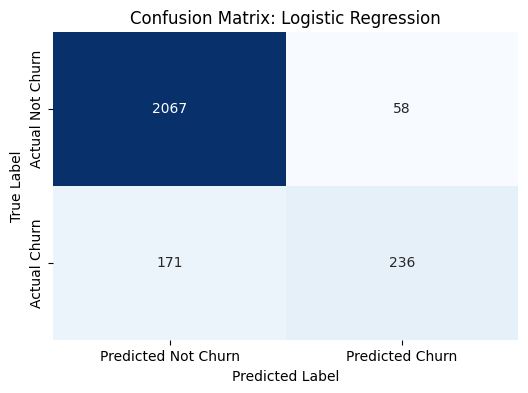

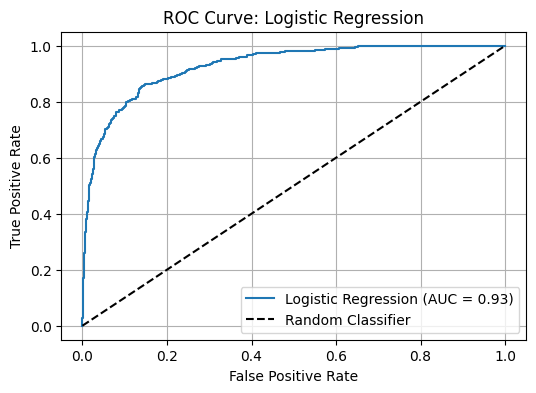


--- Evaluation for Random Forest ---
Accuracy: 0.9514
Precision: 0.9080
Recall: 0.7764
F1-Score: 0.8371
ROC AUC: 0.9865


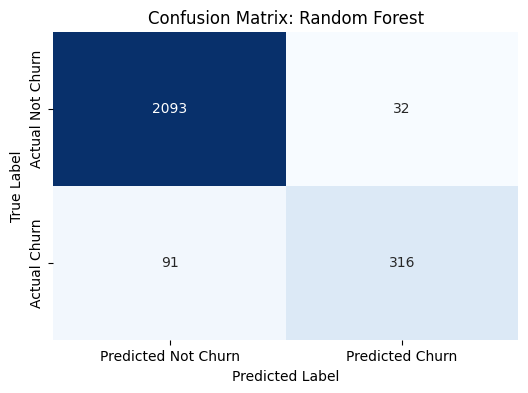

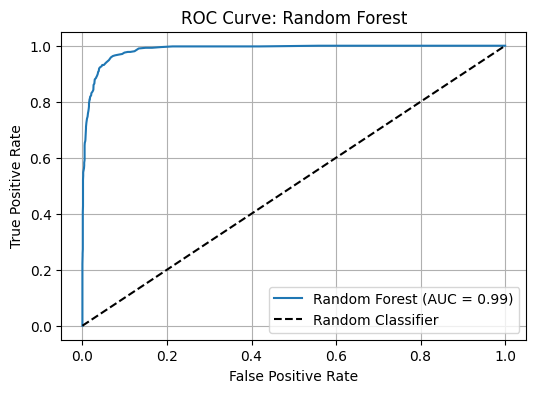


--- Evaluation for Gradient Boosting ---
Accuracy: 0.9605
Precision: 0.9398
Recall: 0.8059
F1-Score: 0.8677
ROC AUC: 0.9887


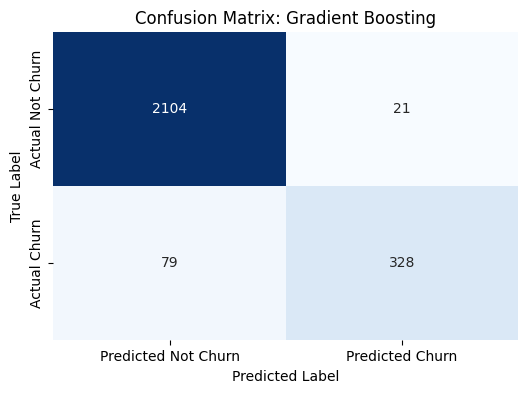

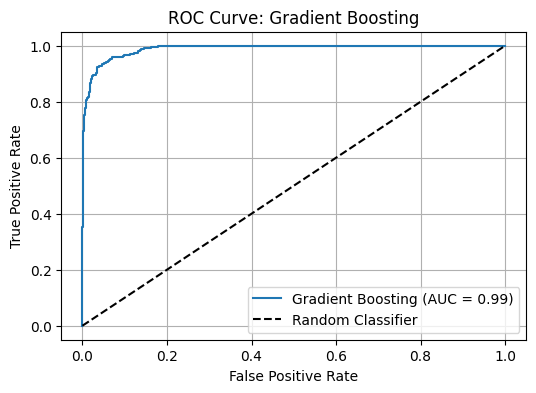

In [37]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n--- Evaluation for {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_prob):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                yticklabels=['Actual Not Churn', 'Actual Churn'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluate each model
evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, y_prob_gb, "Gradient Boosting")

After running our 3 models, we can clearly establsih that Gradient Boosting Classifier demonstrated highest accuracy, precision, recall and F1-Score. While Random Forest model is close second, Logistic Regression came out with worst results out of the 3. While all models show great performance, the gradient boosting method clearly provides the best predictive capability.

## 6. **Model Insights**

In this step we will look at which features have greater importance when predicting Churn, and what threshold to utilise when running our prediction model on the dataset.

### 6.1 **Feature Importance**

Gradient Boosting model provides us with usefull tool feature_importances_ which makes our task of seeing which features of our dataset influence our model the most.

--- Feature Importance Analysis ---

Gradient Boosting Feature Importances:
trans_ct              0.313288
revolving_bal         0.174583
trans_amt             0.172201
ct_chg_q4_q1          0.101260
relationships         0.097119
avg_trans_amt         0.039606
amt_chg_q4_q1         0.034835
trans_ct_per_month    0.017213
contact_count         0.015053
age                   0.010632
dtype: float64


/tmp/ipython-input-38-118604946.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb_importances.head(20).values, y=gb_importances.head(20).index, palette='magma')


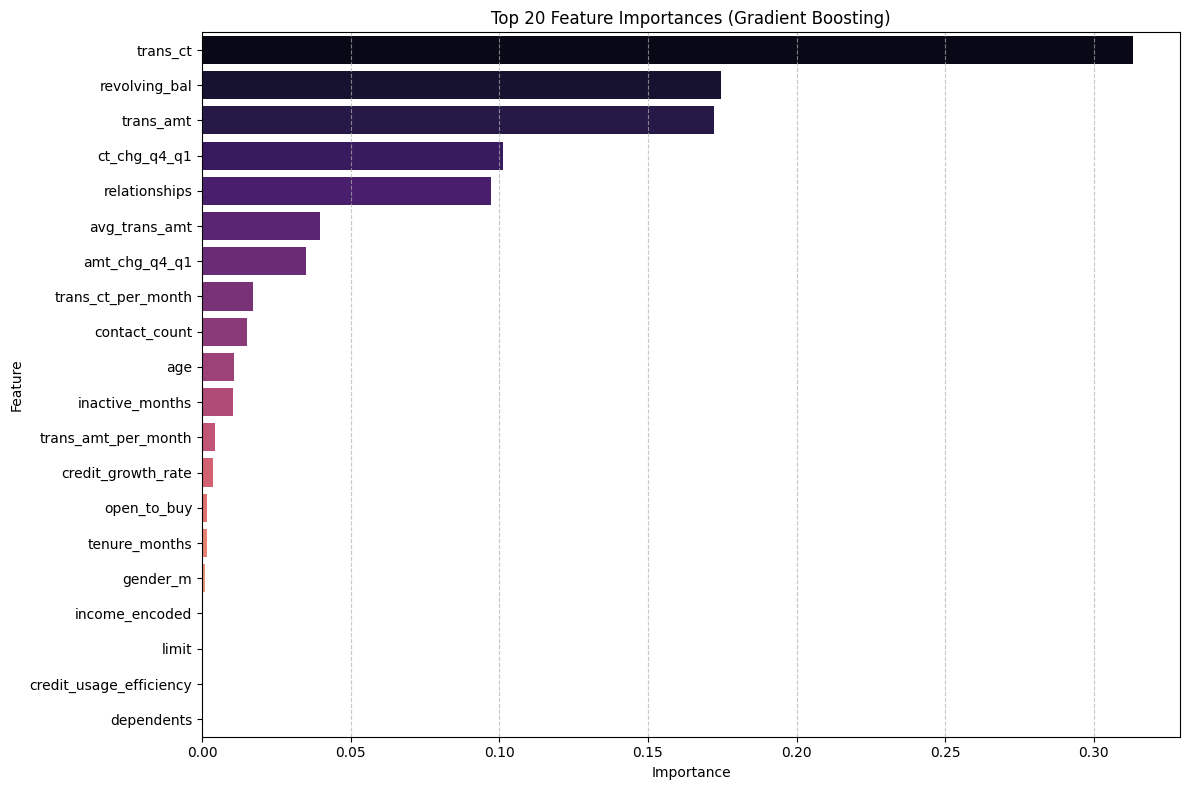

In [38]:
feature_names = X.columns # Get the original feature names from your full feature set X

print("--- Feature Importance Analysis ---")
# --- Feature Importances from Gradient Boosting Model ---
print("\nGradient Boosting Feature Importances:")
gb_importances = pd.Series(gb_model.feature_importances_, index=feature_names).sort_values(ascending=False)
print(gb_importances.head(10)) # Print top 10

# Plotting Gradient Boosting Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=gb_importances.head(20).values, y=gb_importances.head(20).index, palette='magma')
plt.title('Top 20 Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can clearly see that **trans_ct** stands out as overwhelmingly the **most important**, with an importance score significantly higher than any other feature, suggesting it's a **primary driver of the models predictions**. Following **trans_ct**, **revolving_bal** and **trans_amt** are also highly impactful features. Other features like **ct_chg_q4_q1**, **relationships**, **avg_trans_amt**, and **amt_chg_q4_q1** show moderate importance, while features towards the bottom of the list, such as **dependents**, **credit_usage_efficiency**, and **limit**, contribute minimally to the model's decision-making process.

### 6.2 **Identifying optimal categorisation threshold**

In this step we will attempt to identify optimal classification threshold for our model. We will utilise precision_recall_curve to achieve this. This powerfull tool will help us to visualise tradefoff between recall (sensitivity) and precision.

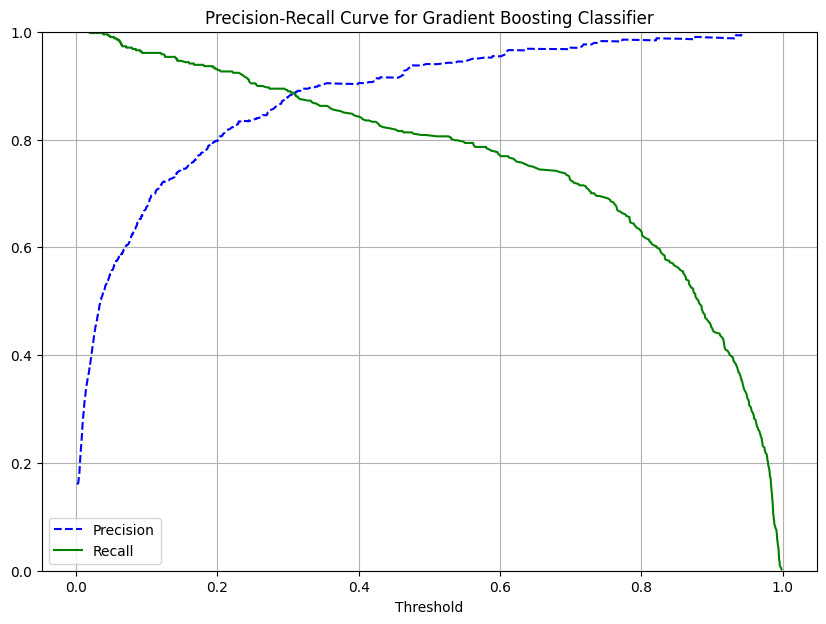

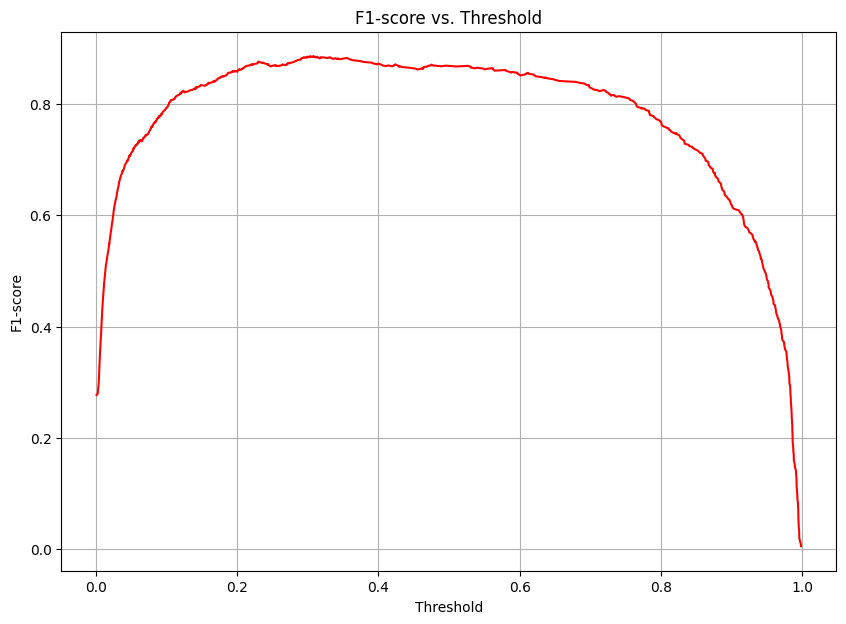

Threshold maximizing F1-score: 0.3034


In [39]:
# Assuming gb_model and X_test_final are available from your test set evaluation
y_scores = gb_model.predict_proba(X_test_final)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(10, 7))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0, 1])
plt.title("Precision-Recall Curve for Gradient Boosting Classifier")
plt.grid(True)
plt.show()

# You can also plot F1-score vs. threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
plt.figure(figsize=(10, 7))
plt.plot(thresholds, f1_scores[:-1], "r-", label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score vs. Threshold")
plt.grid(True)
plt.show()

# Find the threshold that maximizes F1-score
optimal_f1_threshold = thresholds[np.argmax(f1_scores)]
print(f"Threshold maximizing F1-score: {optimal_f1_threshold:.4f}")

Based on the Precision-Recall curve, we can visually identify that the optimal "sweet spot" for our classification threshold appears to be in the range of 0.3 to 0.4. In this segment, both Precision and Recall curves remain relatively high, signifying a strong balance between the model's ability to minimize false positives and effectively capture true positive instances.

### 6.3 **Model Deployment**

In this crucial step, we will deploy our previously trained Gradient Boosting model. We will apply this model to our complete dataset to generate predictions, specifically utilizing a pre-determined optimal classification threshold of 0.38 to classify outcomes. This allows us to translate the model's probabilistic predictions into actionable binary classifications, identifying potential churners based on the analysis from our previous threshold optimization.

In [40]:
# Prepare the entire feature set (X_full) for prediction ---
X_full = df_final.drop('churn_flag', axis=1)

numerical_cols_for_model = [col for col in X_full.select_dtypes(include=np.number).columns.tolist() if col != 'client_id']
non_numerical_cols_for_model = [col for col in X_full.select_dtypes(exclude=np.number).columns.tolist() if col != 'client_id']

X_full_scaled_numerical = scaler.transform(X_full[numerical_cols_for_model])
X_full_processed = pd.DataFrame(X_full_scaled_numerical, columns=numerical_cols_for_model, index=X_full.index)
X_full_processed = pd.concat([X_full_processed, X_full[non_numerical_cols_for_model]], axis=1)
X_full_processed = X_full_processed[X_train_final.columns]

# Get churn probabilities for the entire dataset
df_final_for_dashboard = df_final.copy() # Make a copy to add new columns

df_final_for_dashboard['predicted_churn_probability'] = gb_model.predict_proba(X_full_processed)[:, 1]

# Define the churn risk threshold (use your chosen threshold, e.g., 0.5)
churn_risk_threshold = 0.38 # Or your optimized threshold, e.g., 0.38

# Add predicted churn class based on the threshold
df_final_for_dashboard['predicted_churn_class'] = (df_final_for_dashboard['predicted_churn_probability'] >= churn_risk_threshold)

# Add a flag for "currently at risk and not yet churned"
df_final_for_dashboard['is_currently_at_risk'] = (
    (df_final_for_dashboard['predicted_churn_probability'] >= churn_risk_threshold) &
    (df_final_for_dashboard['churn_flag'] == False) # Only include actual non-churners
)


Let's check how many users from our dataset the model flagged up as being at high risk of churn.

In [41]:
# Count the number of True values in the 'is_currently_at_risk' column
num_at_risk_customers = df_final_for_dashboard['is_currently_at_risk'].sum()

# Print the result
print(f"Number of currently at-risk customers: {num_at_risk_customers}")

# You can also get the percentage if you like
total_customers = len(df_final_for_dashboard)
percentage_at_risk = (num_at_risk_customers / total_customers) * 100
print(f"Percentage of currently at-risk customers: {percentage_at_risk:.2f}%")

Number of currently at-risk customers: 126
Percentage of currently at-risk customers: 1.24%


While this is great and preatty much ready to be imported to power bi to create a dashboard. However i would like remove any of the previously encoded values as these will no be of use to us. We will keep our engineered features.

In [42]:
# Identify columns to drop from df_final_for_dashboard ---
# List all encoded columns that you want to remove
encoded_cols_to_drop = [
    'education_encoded',
    'income_encoded',
    'gender_m',
    'marital_married',
    'marital_single',
    'marital_unknown',
    'card_type_gold',
    'card_type_platinum',
    'card_type_silver'
]

# Identify the original categorical columns that should be kept/re-added
# (Assuming these were the original columns that got encoded)
original_categorical_cols = [
    'gender',
    'education',
    'marital',
    'income',
    'card_type'
]

# First, make a copy to avoid modifying the original df_final_for_dashboard
df_dashboard_final_display = df_final_for_dashboard.copy()

# Drop the encoded columns
df_dashboard_final_display = df_dashboard_final_display.drop(columns=encoded_cols_to_drop, errors='ignore')

# Merge original categorical columns back into the DataFrame
# Ensure df_cleaned is available and contains 'client_id' and the original_categorical_cols
original_data_for_merge = df_cleaned[['client_id'] + original_categorical_cols]

# Merge them back into the prepared dashboard DataFrame
df_dashboard_final_display = pd.merge(
    df_dashboard_final_display,
    original_data_for_merge,
    on='client_id',
    how='left' # Use left join to keep all rows from df_dashboard_final_display
)

# --- IMPLEMENTATION OF CHURN RISK LEVELS ---
# Based on the Precision-Recall Curve analysis:
# - high_risk_threshold: optimized F1-score threshold (~0.38)
# - medium_risk_threshold: Set at 0.10 where Precision is still good and Recall is very high.
high_risk_threshold = 0.38
medium_risk_threshold = 0.10

def assign_churn_risk_level(prob, actual_churn_flag):
    if actual_churn_flag == True:
        return "Churned" # If they already churned, that's their final status
    elif prob >= high_risk_threshold:
        return "High Risk"
    elif prob >= medium_risk_threshold: # This means prob is between medium_risk_threshold and high_risk_threshold
        return "Medium Risk"
    else: # This means prob is less than medium_risk_threshold
        return "Low Risk"

# Apply the function to create the new 'churn_risk_level' column
df_dashboard_final_display['churn_risk_level'] = df_dashboard_final_display.apply(
    lambda row: assign_churn_risk_level(row['predicted_churn_probability'], row['churn_flag']),
    axis=1
)

# Updated new_prediction_cols to include the new 'churn_risk_level'
new_prediction_cols = [
    'predicted_churn_probability',
    'predicted_churn_class',
    'is_currently_at_risk',
    'churn_risk_level' # Added the new column here
]

# The order of columns in final dashboard DataFrame
# Ensure 'churn_risk_level' is included in the final order.
desired_order = [
    'client_id', 'churn_flag', 'age', 'gender', 'dependents', 'education', 'marital', 'income',
    'card_type', 'tenure_months', 'relationships', 'inactive_months',
    'contact_count', 'limit', 'revolving_bal', 'open_to_buy', 'amt_chg_q4_q1',
    'trans_amt', 'trans_ct', 'ct_chg_q4_q1', 'util_ratio', # Original numerical/categorical
    'trans_amt_per_month', 'trans_ct_per_month', 'avg_trans_amt', # Engineered numerical
    'balance_to_limit_ratio', 'credit_usage_efficiency', 'credit_growth_rate', # Engineered numerical
    'predicted_churn_probability', 'predicted_churn_class', 'is_currently_at_risk', # Original model outputs
    'churn_risk_level' # New risk level
]

# Filter `desired_order` to only include columns that actually exist in the DataFrame
# This handles cases where some intermediate columns might have been dropped or transformed
final_col_order = [col for col in desired_order if col in df_dashboard_final_display.columns]

df_dashboard_final_display = df_dashboard_final_display[final_col_order]

# Count distribution of risk levels for verification
print("\n--- Distribution of Churn Risk Levels (for non-churned customers) ---")
print(df_dashboard_final_display[df_dashboard_final_display['churn_flag'] == False]['churn_risk_level'].value_counts())
print("\n--- Full Distribution of Churn Risk Levels ---")
print(df_dashboard_final_display['churn_risk_level'].value_counts())


--- Distribution of Churn Risk Levels (for non-churned customers) ---
churn_risk_level
Low Risk       7819
Medium Risk     555
High Risk       126
Name: count, dtype: int64

--- Full Distribution of Churn Risk Levels ---
churn_risk_level
Low Risk       7819
Churned        1627
Medium Risk     555
High Risk       126
Name: count, dtype: int64


We will save resulting dataset for the next step of the project. Where we build a dashboard around our findings.

In [45]:
# output_csv_path = 'churn_dashboard_data.csv'
# df_dashboard_final_display.to_csv(output_csv_path, index=False)
# print(f"\nDataFrame successfully exported to '{output_csv_path}' for Power BI.")


DataFrame successfully exported to 'churn_dashboard_data.csv' for Power BI.
